# Analyzing the performances 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import os 
import numpy as np

#inputs for evaluation
path_test='/home/lucien/projet_lepinoc/bees_detection/src/data/inputs/test.csv'
path_train='/home/lucien/projet_lepinoc/bees_detection/src/data/inputs/train.csv'

df_test=pd.read_csv(path_test,header=None)
df_train=pd.read_csv(path_train,header=None)

#outputs from evaluation
path_evaluation_test='/home/lucien/projet_lepinoc/bees_detection/src/data/outputs/evaluation_on_test_on_2023-03-23-12:55:54.csv'
path_evaluation_train='/home/lucien/projet_lepinoc/bees_detection/src/data/outputs/evaluation_on_train_on_2023-03-23-16:22:39.csv'

df_evaluation_test=pd.read_csv(path_evaluation_test)
df_evaluation_train=pd.read_csv(path_evaluation_train)

# keep only the last row 'all species'
df_evaluation_test_global=df_evaluation_test.iloc[-1,:]
df_evaluation_train_global=df_evaluation_train.iloc[-1,:]

# output by species
df_evaluation_test=df_evaluation_test.iloc[:-1,:]#.sort_values(by='label')
df_evaluation_train=df_evaluation_train.iloc[:-1,:]#.sort_values(by='label')



# Inputs

Is every specie evenly distributed ?

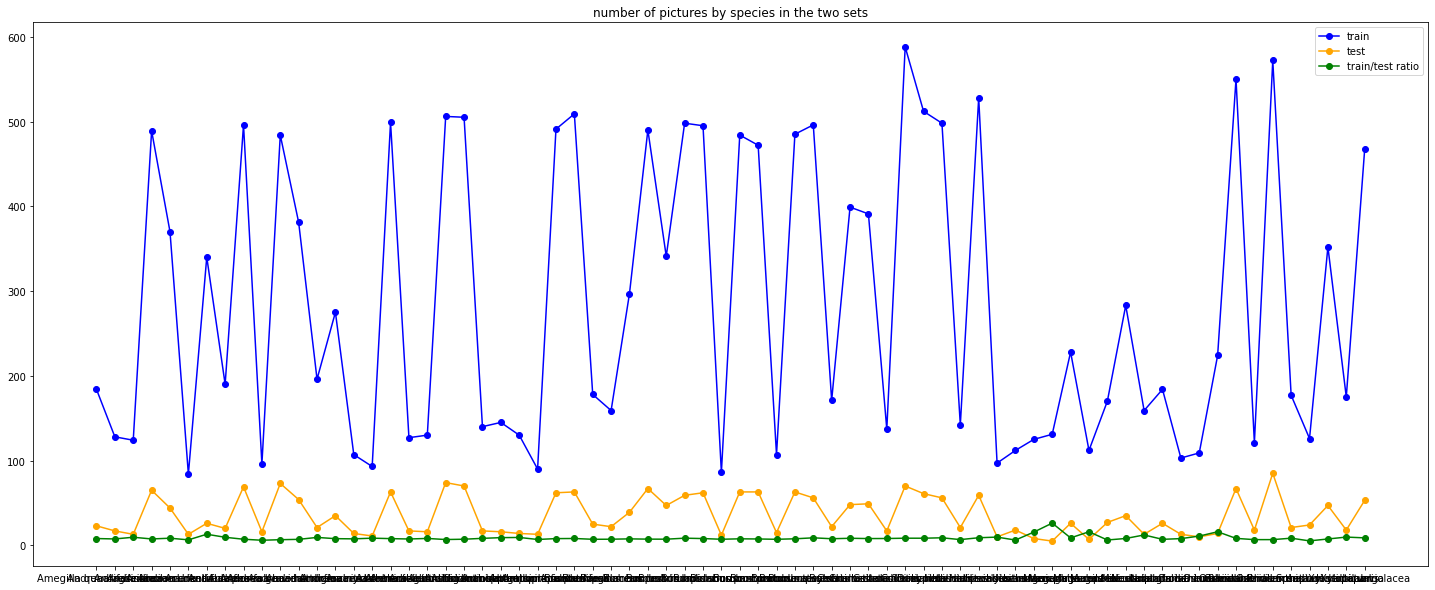

In [4]:
labels = df_evaluation_test['label'].unique()

# number of pictures by species

df_test_nb=df_test[0].str.split(os.path.sep,expand=True).iloc[:,1].value_counts()
df_train_nb=df_train[0].str.split(os.path.sep,expand=True).iloc[:,1].value_counts()

# ratio of pictures by species in the two sets
df_test_nb=df_test_nb.sort_index()
df_train_nb=df_train_nb.sort_index()
df_train_test_ratio=df_train_nb/df_test_nb


# number of pictures by species in the two sets

plt.figure(figsize=(25,10))

plt.plot(df_train_nb.index,df_train_nb.values,'o-',label='train',color='blue')
plt.plot(df_test_nb.index,df_test_nb.values,'o-',label='test',color='orange')
plt.plot(df_train_test_ratio.index,df_train_test_ratio.values,'o-',label='train/test ratio',color='green')
plt.legend()
plt.title('number of pictures by species in the two sets')
plt.show()



The ratio curve is flat, the split is good.
What about augmenting the data across the species ? 

# Global performances

How does the model perfom ?

In [5]:
train_metrics=df_evaluation_train.iloc[-1,:]
test_metrics=df_evaluation_test.iloc[-1,:]   


print('Train metrics')
print(train_metrics)
print('Test metrics')
print(test_metrics)



Train metrics
label                   Nomadalathburiana
class_p_global                      0.939
class_r_global                      0.903
class_f1_global                     0.921
bbox_p_global                       0.697
bbox_r_global                        0.67
bbox_f1_global                      0.683
ious_global                         0.656
intersections_global                0.755
Name: 69, dtype: object
Test metrics
label                   Anthophorafurcata
class_p_global                      0.812
class_r_global                        1.0
class_f1_global                     0.897
bbox_p_global                       0.562
bbox_r_global                       0.692
bbox_f1_global                      0.621
ious_global                         0.627
intersections_global                0.856
Name: 69, dtype: object


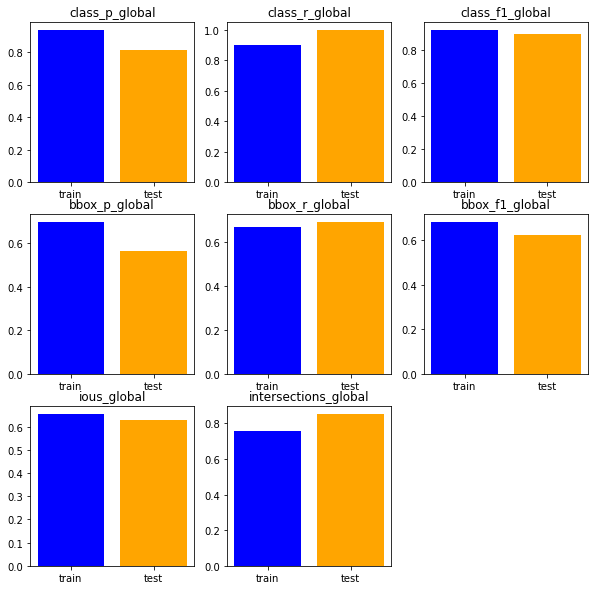

In [6]:
# plot the metrics

plt.figure(figsize=(10,10))

for i, metric in enumerate(train_metrics[1:]):
    i=i+1
    plt.subplot(3,3,i)
    plt.bar(['train','test'],[train_metrics[i],test_metrics[i]],color=['blue','orange'])
    plt.title(train_metrics.index[i])




Performs pretty well, in particular no obvious sign of overfitting (globally metric_train=metric_test)

- class_p_global : 

# Performances for every species


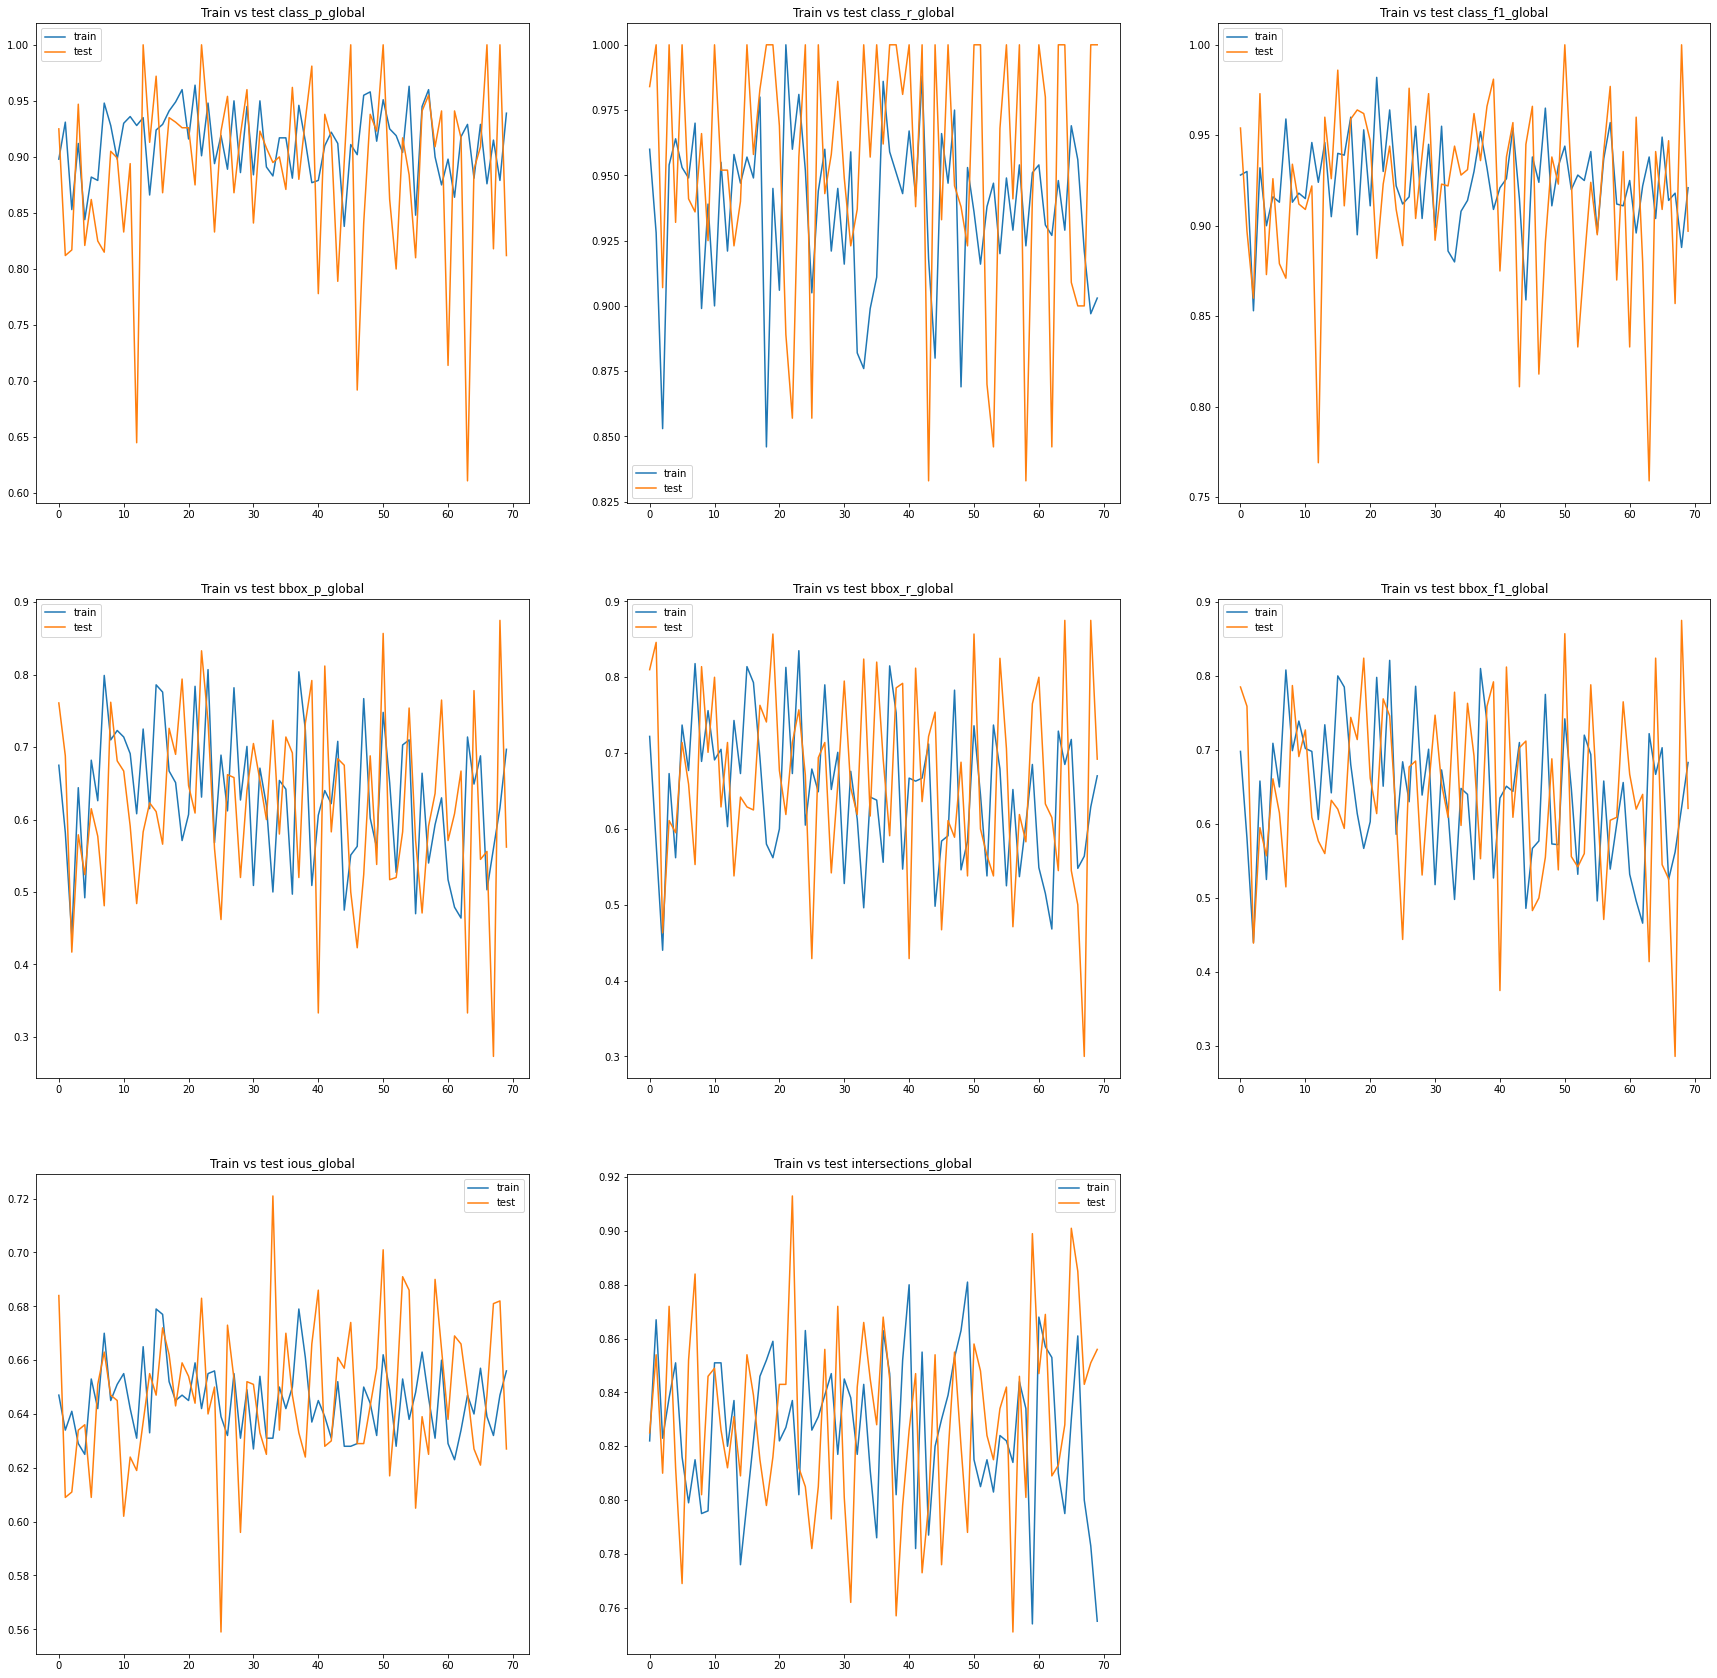

In [7]:

# plot the metrics to see the disparity between species

plt.figure(figsize=(30,30))

for i, metric in enumerate(train_metrics[1:]):
    i=i+1
    plt.subplot(3,3,i)
    plt.plot(df_evaluation_train[train_metrics.index[i]],label='train')
    plt.plot(df_evaluation_test[train_metrics.index[i]],label='test')
    plt.title('Train vs test {}'.format(train_metrics.index[i]))
    plt.legend()



Just a quick overview of the disparities

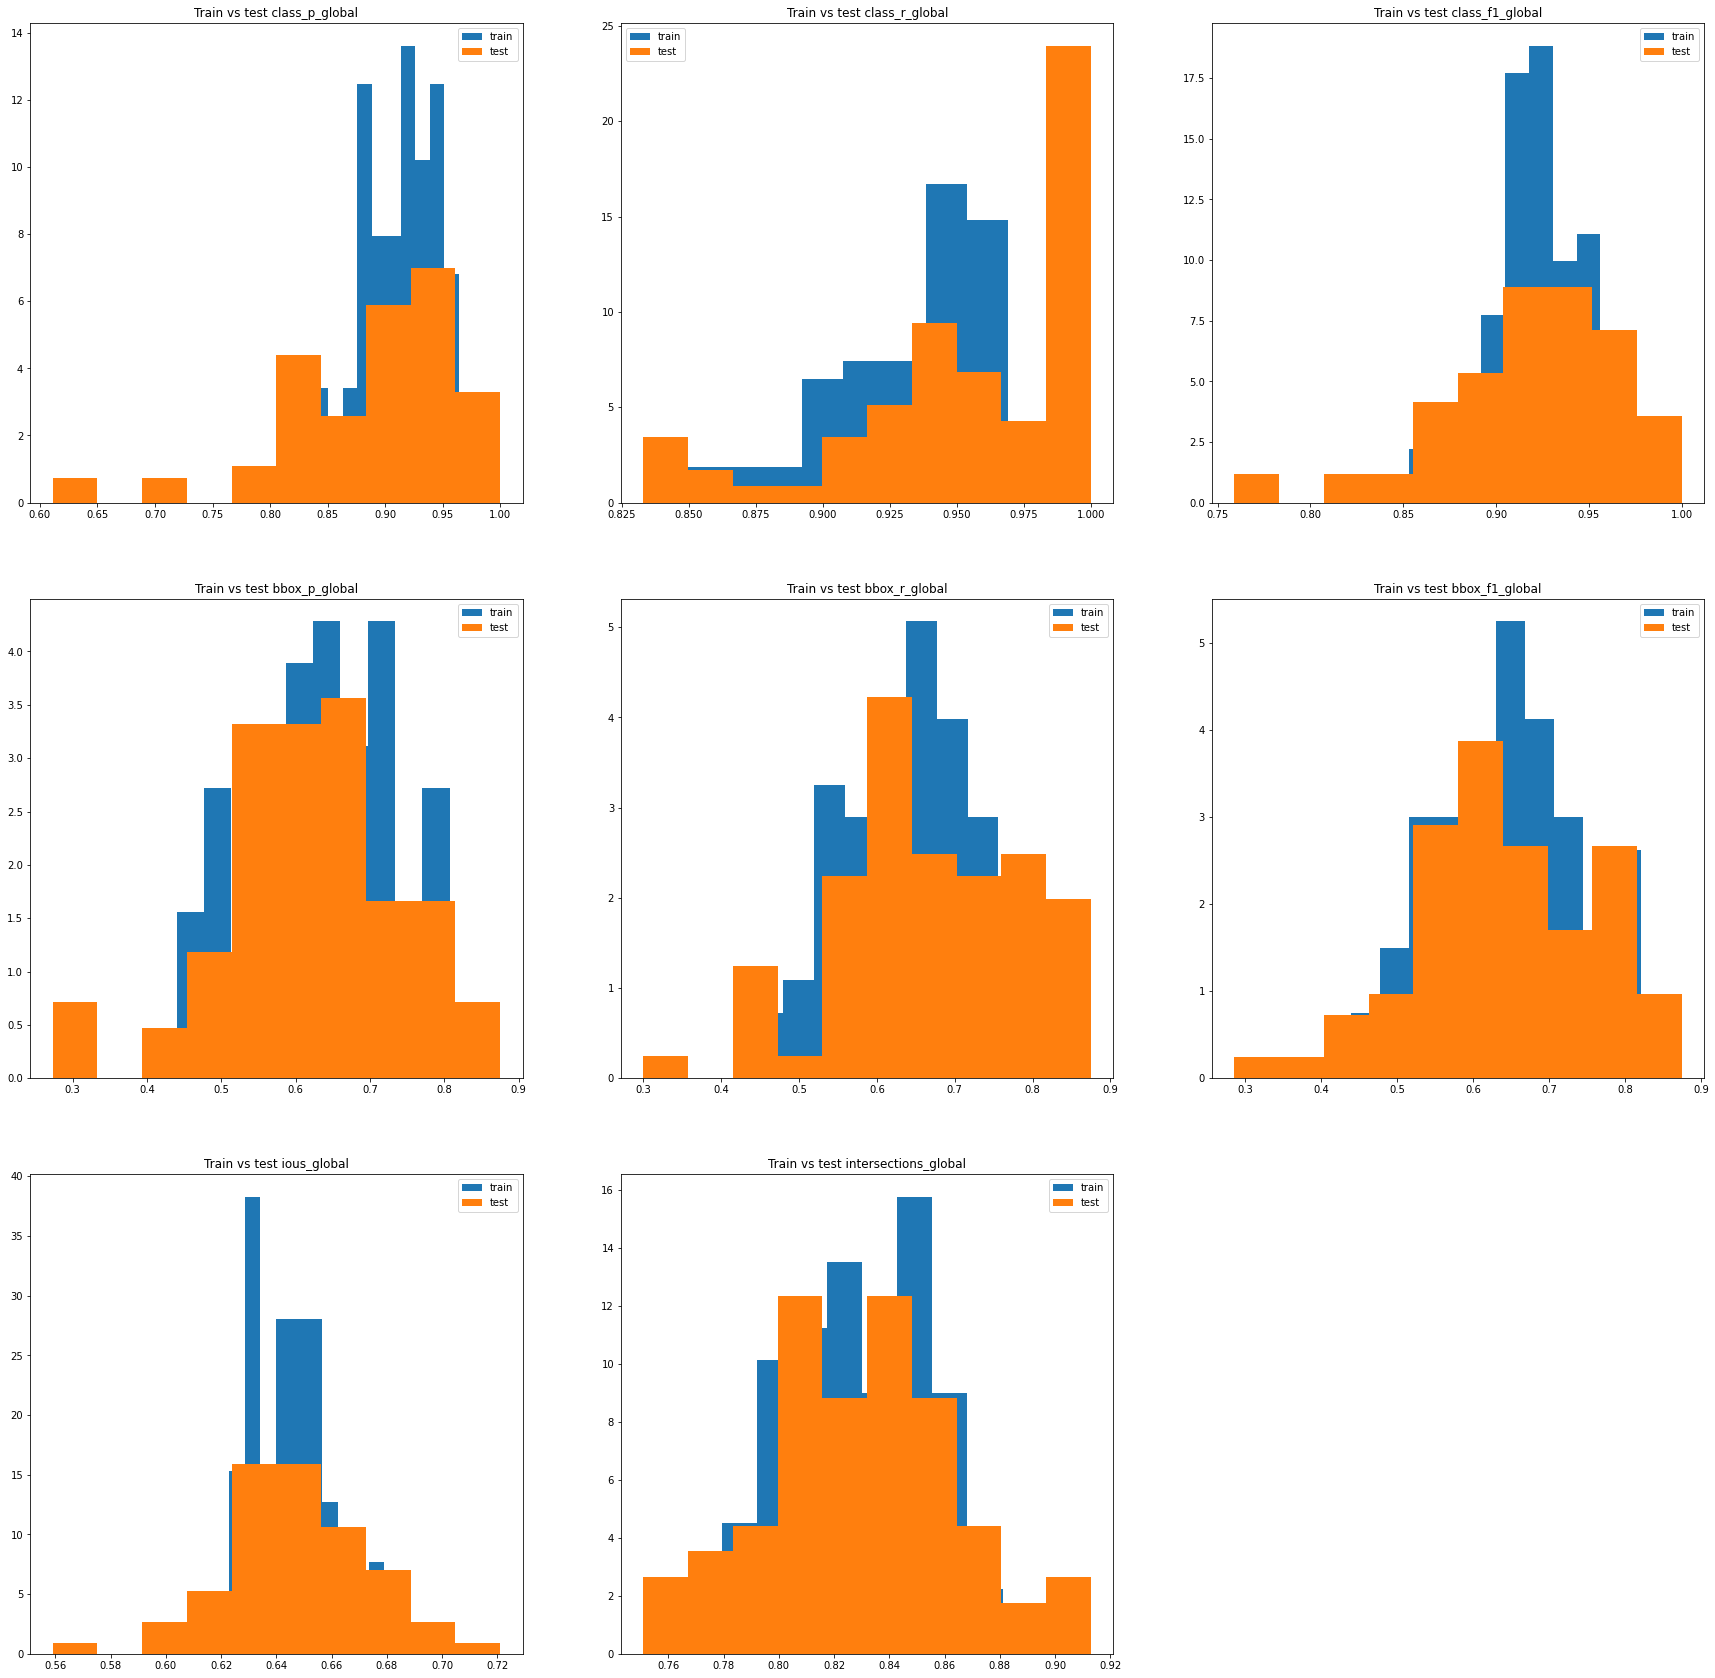

In [11]:
# plot the metrics to see the repartition of metrics with histograms
# so that we can compare train and test sets we normalize the histograms
# with the ratio of pictures by species in the two sets

plt.figure(figsize=(30,30))

for i, metric in enumerate(train_metrics[1:]):
    i=i+1
    plt.subplot(3,3,i)
    plt.hist(df_evaluation_train[train_metrics.index[i]],label='train',density=True)
    plt.hist(df_evaluation_test[train_metrics.index[i]],label='test',density=True)
    plt.title('Train vs test {}'.format(train_metrics.index[i]))
    plt.legend()


In [30]:
df_test

,0,1,2,3,4,5,6,7
0,BD_71/Bombus pascuorum/Bombus pascuorum29533.jpg,147.500000,217.500000,307.500000,398.750000,Anthophila,364,500
1,BD_71/Melecta albifrons/Melecta albifrons6865.jpg,188.750000,100.507812,355.000000,260.507812,Anthophila,500,333
2,BD_71/Andrena hattorfiana/Andrena hattorfiana9...,236.607143,108.522321,385.000000,201.250000,Anthophila,500,333
3,BD_71/Xylocopa valga/Xylocopa valga18291.jpg,48.750000,158.482143,294.348214,370.000000,Anthophila,333,500
4,BD_71/Anthidium florentinum/Anthidium florenti...,40.000000,116.250000,427.500000,410.000000,Anthophila,500,481
...,...,...,...,...,...,...,...,...
2475,BD_71/Apis mellifera/Apis mellifera16929.jpg,98.000000,90.000000,614.285714,684.196429,Anthophila,800,790
2476,BD_71/Bombus pascuorum/Bombus pascuorum90326.jpeg,26.250000,36.250000,471.250000,455.000000,Anthophila,500,500
2477,BD_71/Andrena vaga/Andrena vaga51636.jpg,56.250000,53.517857,388.392857,258.750000,Anthophila,500,333
2478,BD_71/Colletes hederae/Colletes hederae9776.jpg,36.000000,76.000000,552.000000,732.000000,Anthophila,599,800


Is this a problem of representation ?

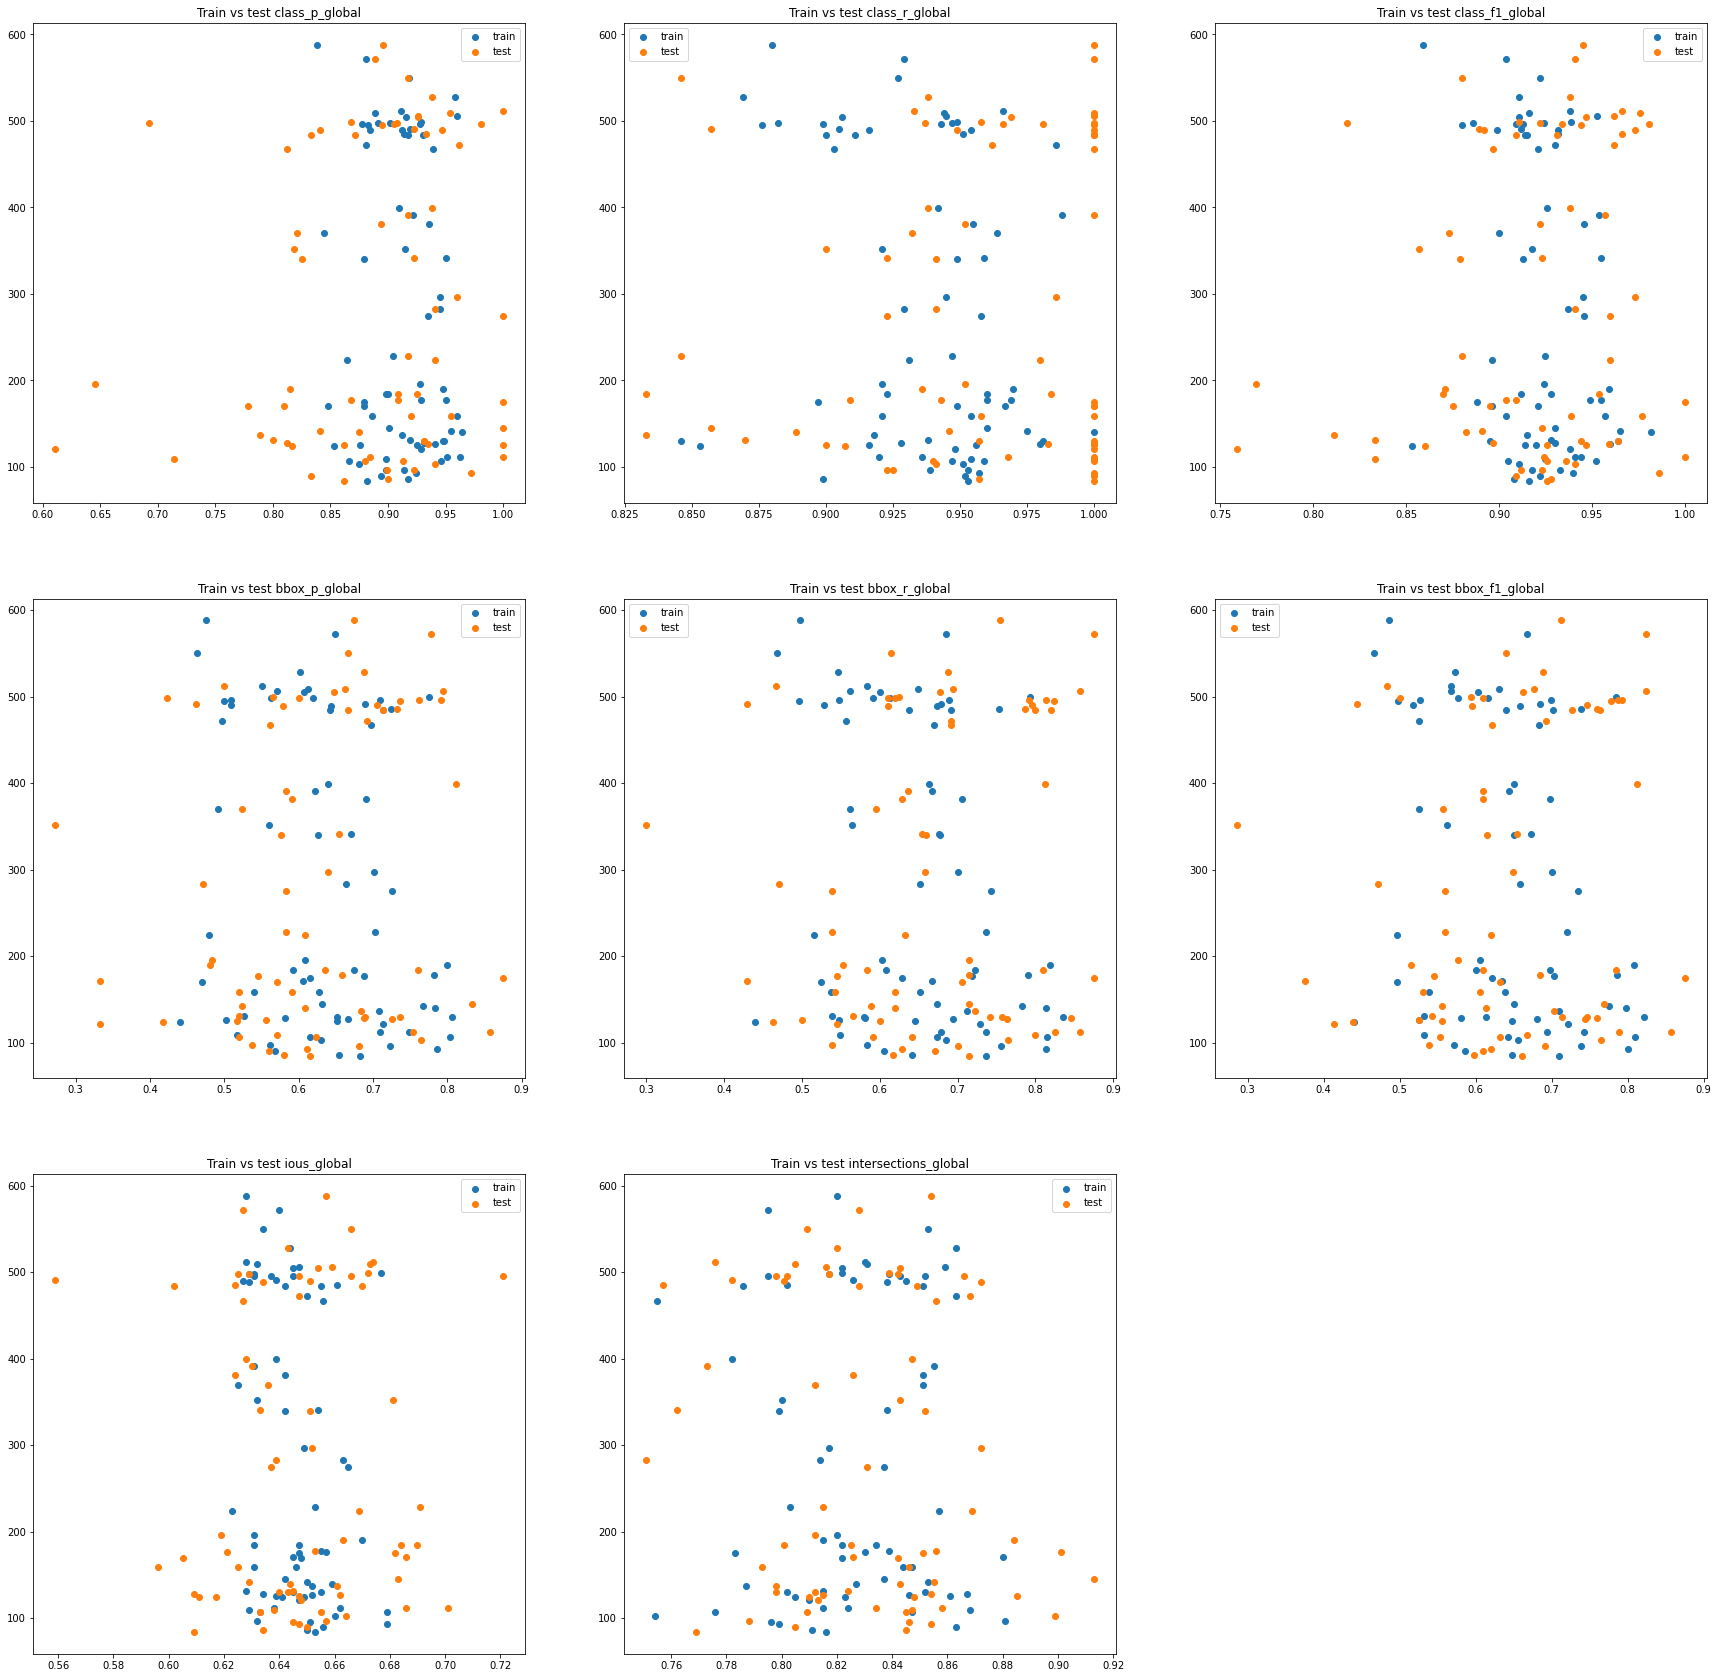

In [37]:
# plot the metrics given the number of pictures by species in the two sets
# x axis is the metric
# y axis is the number of pictures by species in the two sets
# so that we can compare train and test sets we normalize the data
# with the mean of the ratio of pictures by species in the two sets
# plot the logistic regression coefficients and the intercept and the line of the logistic regression


plt.figure(figsize=(30,30))


for i, metric in enumerate(train_metrics[1:]):
    i=i+1
    plt.subplot(3,3,i)
    plt.scatter(df_evaluation_train[train_metrics.index[i]],df_train_nb.values,label='train')
    plt.scatter(df_evaluation_test[train_metrics.index[i]],df_test_nb.values*df_train_test_ratio,label='test')
    plt.title('Train vs test {}'.format(train_metrics.index[i]))
    plt.legend()


In [38]:
np.corrcoef(df_train_nb,df_evaluation_train[train_metrics.index[1]])[0,1]

-0.10326208332075996

devrait être positive ??